# Expansión en series

## Serie de Taylor

Sea una función f(x) continua e infinitamente diferenciable, esta puede expresarse en torno a $a$ mediante una serie de potencias
\begin{equation}
f(x) = \sum_{n=0}^\infty c_n (x-a)^n
\end{equation}

La m-ésima derivada de $f(x)$ es:
\begin{equation}
f^{(m)}(x) = \sum_{n=m}^\infty c_n (m!)(x-a)^{n-m} = \sum_{p=0}^\infty c_{p+m} (m!)(x-a)^{p}
\end{equation}

donde se ha hecho el cambio de índice $p=n-m$. Al evaluar en x=a se obtiene
\begin{equation}
f^{(m)}(a) = \sum_{p=0}^\infty c_{p+m} (m!)(a-a)^{p} = c_p (m!)
\end{equation}

El único término que sobrevive es el que tiene potencia cero, despejando $c_p$:
\begin{equation}
c_m = \frac{f^{(m)}(a)}{m!}
\end{equation}

Sustituyendo en la serie
\begin{equation}
f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n
\end{equation}

**Haga la expansión en series de Taylor en torno a $x=0$ de $f(x)=e^{x}$ en el intervalo $x \varepsilon [0,10]$ hasta potencias de grado 10.**

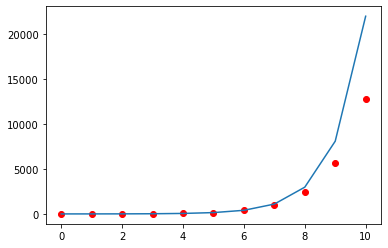

In [1]:
from scipy.misc import derivative
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return np.exp(x)

a=0.0

x=np.linspace(0,10,11)

y=f(a)*(x-a)**0.0
for n in range(1,11):
    y=y+derivative(f,a,n=n,order=2*n+1)/np.math.factorial(n)*(x-a)**n
    
plt.scatter(x,y,color='r')
plt.plot(x,f(x))
plt.show()

## Serie de Fourier

Una funcion periodica se puede aproximar por
\begin{equation}
f(x)=\frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n cos \left( \frac{2n\pi}{T}x \right) + b_n sin \left( \frac{2n\pi}{T}x \right) \right]
\end{equation}

donde
\begin{equation}
a_0 = \frac{2}{T} \int\limits_{-T/2}^{T/2} f(x) dx
\end{equation}
\begin{equation}
a_n = \frac{2}{T} \int\limits_{-T/2}^{T/2} f(x) cos \left( \frac{2n\pi}{T}x \right) dx
\end{equation}
\begin{equation}
b_n = \frac{2}{T} \int\limits_{-T/2}^{T/2} f(x) sin \left( \frac{2n\pi}{T}x \right) dx
\end{equation}


**Haga la expansión en series de Fourier de la $f(x)=x$ en el intervalo $x \varepsilon [-10,10]$ con $n=10$**

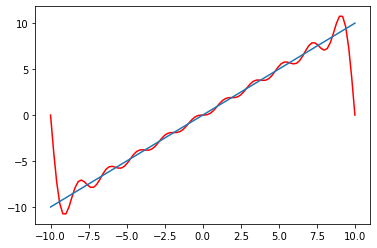

In [2]:
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np

a=-10.0
b=10.0

T=b-a

x=np.linspace(a,b,100)

a_0 = 2.0/T*integrate.quad(lambda x: x,a,b)[0]
y = a_0/2.0*x**0.0

for n in range(1,11):
    a_n = 2.0/T*integrate.quad(lambda x: x*np.cos(2*n*np.pi/T*x),a,b)[0]
    b_n = 2.0/T*integrate.quad(lambda x: x*np.sin(2*n*np.pi/T*x),a,b)[0]
    y=y+a_n*np.cos(2*n*np.pi/T*x)+b_n*np.sin(2*n*np.pi/T*x)
    
plt.plot(x,y,color='r')
plt.plot(x,x)
plt.show()

**Haga la expansión en series de Fourier de la fución escalón en el intervalo $x \varepsilon [-10,10]$ con $n=10$**

\begin{equation}
f(x) = \left\{
  \begin{array}{ll}
  0      & \mathrm{si\ } x < 0\\
  1 & \mathrm{si\ } x>0 \\
  \end{array}
  \right.
\end{equation}


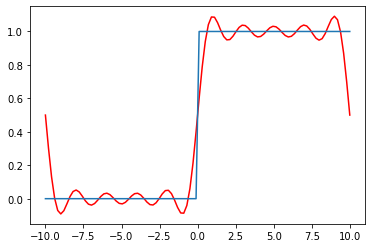

In [3]:
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np

a=-10.0
b=10.0

T=b-a

x=np.linspace(-10,10,100)

a_0 = 2.0/T*integrate.quad(lambda x: np.piecewise(x,x>=0,[1,0]),a,b)[0]
y = a_0/2.0*x**0.0

for n in range(1,11):
    a_n = 2.0/T*integrate.quad(lambda x: np.piecewise(x,x>=0,[1,0])*np.cos(2*n*np.pi/T*x),a,b)[0]
    b_n = 2.0/T*integrate.quad(lambda x: np.piecewise(x,x>=0,[1,0])*np.sin(2*n*np.pi/T*x),a,b)[0]
    y=y+a_n*np.cos(2*n*np.pi/T*x)+b_n*np.sin(2*n*np.pi/T*x)
    
plt.plot(x,y,color='r')
plt.plot(x,np.piecewise(x,x>=0,[1,0]))
plt.show()

## Referencias

- Gersting, J. L. Technical Calculus with Analytic Geometry, Dover ed.; Dover: New York, 1992.
- Jackson, J. D. Mathematics for Quantum Mechanics: An Introductory Survey of Operators, Eigenvalues, and Linear Vector Spaces, Dover ed.; Dover books on mathematics; Dover: Mineola, N.Y, 2006.
- Tolstov, G. P. Fourier Series, Nachdr.; Dover books on mathematics; Dover: New York, 2009.